In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil1e9/loan-default")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-default


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
df = pd.read_csv('/kaggle/input/loan-default/Loan_default.csv')

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
df.shape

(255347, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

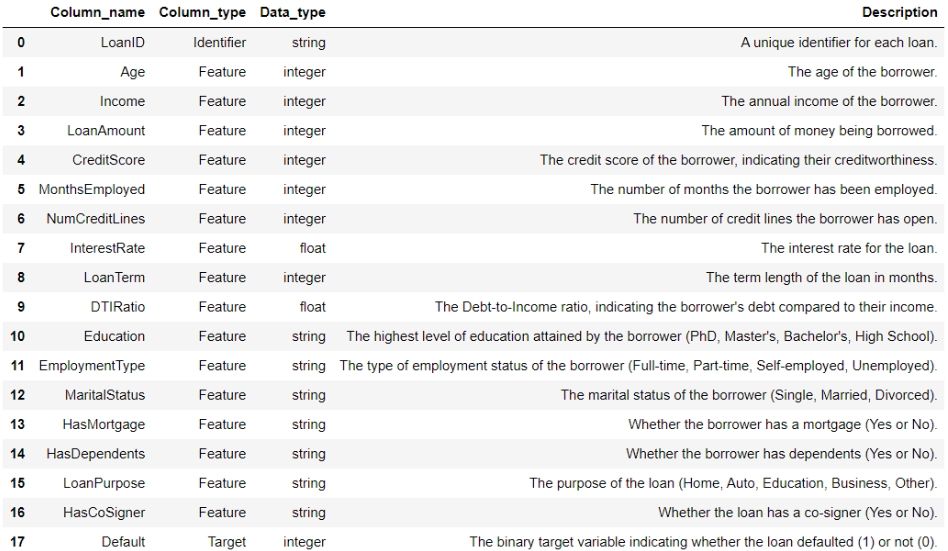

In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()/len(df)*100

,0
LoanID,0.0
Age,0.0
Income,0.0
LoanAmount,0.0
CreditScore,0.0
MonthsEmployed,0.0
NumCreditLines,0.0
InterestRate,0.0
LoanTerm,0.0
DTIRatio,0.0


# No null values in this data set

In [ ]:
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


Feature Selection:

dropping LoanID

we can divide features into two types:
- borrower characteristics : Age,Income,CreditScore,MonthsEmployed,NumCreditLines, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, HasCoSigner
- Loan characteristics : LoanAmount, InterestRate, LoanTerm, DTIRatio, LoanPurpose

# Important Features
- CreditScore
- Income, LoanAmount, DTIRatio
- Interest, LoanTerm

then other features can affect demographic and contextual information




In [ ]:
df_cleaned = df.drop(columns=['LoanID'])

In [ ]:
df_cleaned

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


One hot encoding for categorical data excet education

In [ ]:
cols = ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasCoSigner', 'LoanPurpose', 'HasDependents']

In [ ]:
df1=  pd.get_dummies(df_cleaned, columns=cols, drop_first=True)

In [ ]:
df1.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasCoSigner_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasDependents_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,...,False,True,False,False,True,False,False,False,True,False
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,...,True,False,False,True,False,False,False,False,False,True
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,...,True,False,False,False,False,False,False,False,False,True


mapping education levels

In [ ]:
edu = {'High School': 0 , "Bachelor's": 1, "Master's": 2, 'PhD': 3}
df1['Education'] = df1['Education'].map(edu)

In [ ]:
df1.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasCoSigner_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasDependents_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,False,True,False,False,True,False,False,False,True,False
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,True,False,False,True,False,False,False,False,False,True
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
X = df1.drop('Default', axis = 1)
y = df1['Default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
# using stratify to ensure a balance representation of defaults

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (178742, 22)
X_test shape: (76605, 22)
y_train shape: (178742,)
y_test shape: (76605,)


In [ ]:
print("\nDistribution of 'Default' in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of 'Default' in testing set:")
print(y_test.value_counts(normalize=True))


Distribution of 'Default' in training set:
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

Distribution of 'Default' in testing set:
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


# Logistic Regression



In [ ]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
log_reg_model.fit(X_train, y_train)

#Prediction
y_pred_lr = log_reg_model.predict(X_test)
y_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]
#Evaluating the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("-" * 50)

Logistic Regression Accuracy: 0.6730
Logistic Regression Precision: 0.2132
Logistic Regression Recall: 0.6751
Logistic Regression F1-Score: 0.3241
Logistic Regression ROC AUC: 0.7379
Logistic Regression Confusion Matrix:
[[45548 22161]
 [ 2890  6006]]
--------------------------------------------------


# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
#Prediction
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
#Evaluation
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree ROC AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("-" * 50)

Decision Tree Accuracy: 0.8130
Decision Tree Precision: 0.1939
Decision Tree Recall: 0.1933
Decision Tree F1-Score: 0.1936
Decision Tree ROC AUC: 0.5439
Decision Tree Confusion Matrix:
[[60557  7152]
 [ 7176  1720]]
--------------------------------------------------


# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

#Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("-" * 50)

Random Forest Accuracy: 0.8850
Random Forest Precision: 0.6824
Random Forest Recall: 0.0179
Random Forest F1-Score: 0.0348
Random Forest ROC AUC: 0.7333
Random Forest Confusion Matrix:
[[67635    74]
 [ 8737   159]]
--------------------------------------------------


In [ ]:
neg_count = Counter(y_train)[0]
pos_count = Counter(y_train)[1]
scale_pos_weight_value = neg_count / pos_count
print(f"XGBoost scale_pos_weight: {scale_pos_weight_value:.2f}")
xgb_model = XGBClassifier(n_estimators=100,random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("-" * 50)

XGBoost scale_pos_weight: 7.61
XGBoost Accuracy: 0.7179
XGBoost Precision: 0.2311
XGBoost Recall: 0.6144
XGBoost F1-Score: 0.3359
XGBoost ROC AUC: 0.7378
XGBoost Confusion Matrix:
[[49526 18183]
 [ 3430  5466]]
--------------------------------------------------


In [ ]:
# Store models in a dictionary for easy iteration
models_to_compare = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}


results_data = []
y_proba_for_roc = {}

for model_name, model in models_to_compare.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_proba_for_roc[model_name] = y_proba

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Append to results list
    results_data.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })

results_df = pd.DataFrame(results_data)

results_df_sorted = results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

print("--- Model Performance Comparison Table ---")
print(results_df_sorted.round(4).to_string())


--- Model Performance Comparison Table ---
                 Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Logistic Regression    0.6730     0.2132  0.6751    0.3241   0.7379
1              XGBoost    0.7179     0.2311  0.6144    0.3359   0.7378
2        Random Forest    0.8850     0.6824  0.0179    0.0348   0.7333
3        Decision Tree    0.8130     0.1939  0.1933    0.1936   0.5439


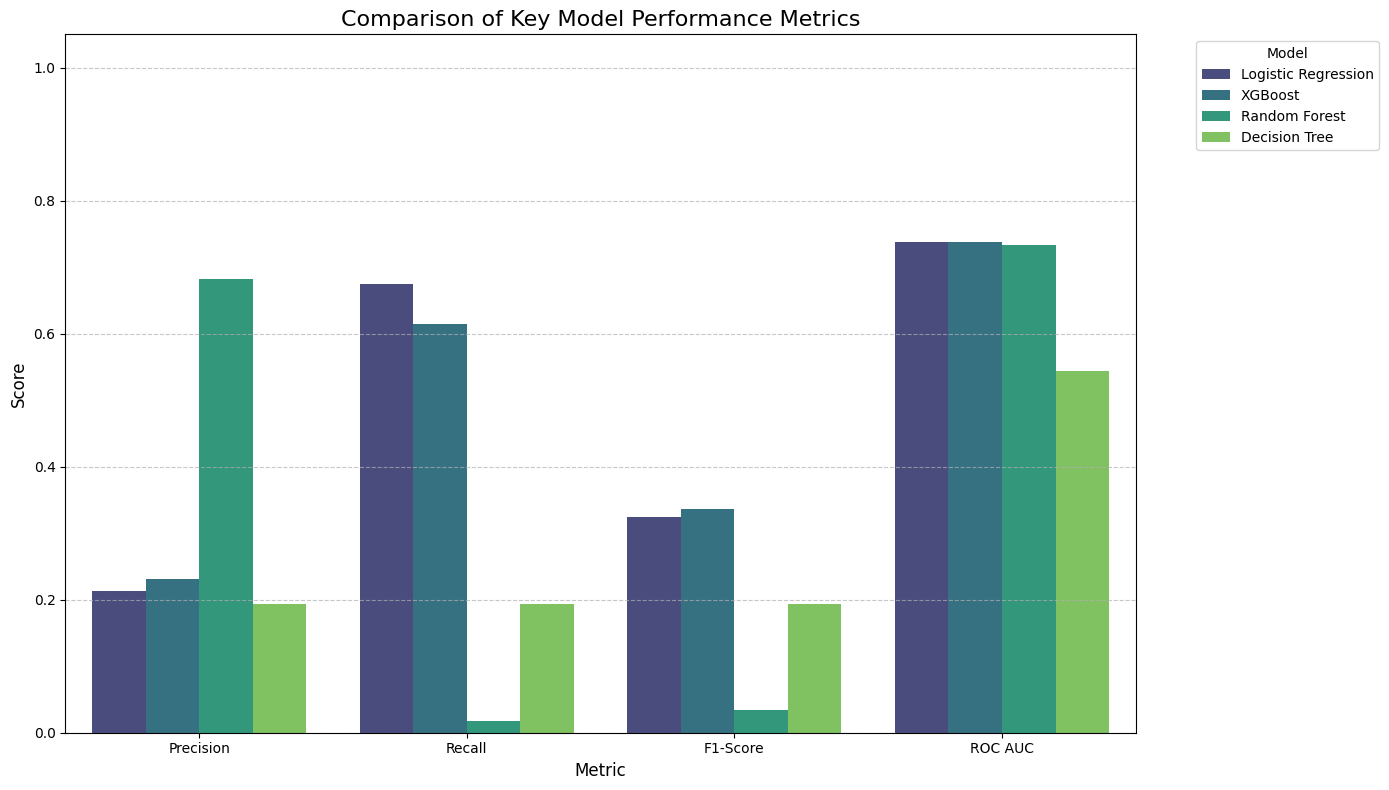

In [ ]:
metrics_to_plot = ["Precision", "Recall", "F1-Score", "ROC AUC"]
results_melted = results_df_sorted.melt(id_vars="Model", value_vars=metrics_to_plot,
                                        var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 8))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted, palette="viridis")
plt.title("Comparison of Key Model Performance Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.ylim(0, 1.05) # Scores are between 0 and 1
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

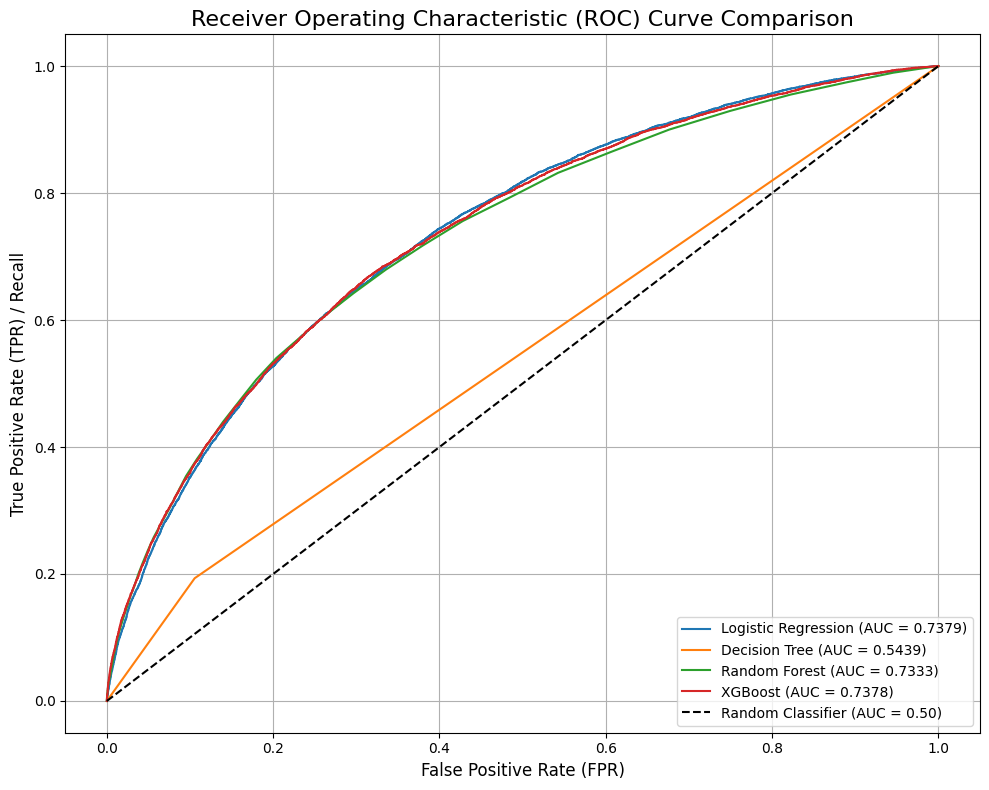

--------------------------------------------------


In [ ]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for model_name, y_proba in y_proba_for_roc.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR) / Recall", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve Comparison", fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

print("-" * 50)